# Homework 4

## FINM 37500: Fixed Income Derivatives

### Mark Hendricks

#### Winter 2025

***

### Data

The file `data/ratetree_data_2025-01-31.xlsx` has a binomial tree of interest rates fit to...
* discount curves from `cap_curves_2025-01-31.xlsx`
* implied vols from `cap_curves_2025-01-31.xlsx`

Note the following...
* Suppose the present date is `2025-01-31`.
* The rates are continuously compounded.
* The rates are for the following quarter. So teh rate at $t=0$ is the continuously compounded rate for the interval $t=0$ to $t=.25$.

Take this binomial tree as given; there is no need to fit it yourself.

In [1]:
import pandas as pd

DATE = '2025-01-31'
FILEIN = f'../data/ratetree_data_{DATE}.xlsx'
sheet_tree = 'rate tree'

ratetree = pd.read_excel(FILEIN, sheet_name=sheet_tree).set_index('state')
ratetree.columns.name = 'time'

ratetree.style.format('{:.1%}',na_rep='').format_index('{:.2f}',axis=1)

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75
state,,,,,,,,,,,,,,,,,,,,
0,4.2%,4.3%,4.4%,4.8%,5.1%,6.4%,7.6%,9.1%,10.1%,11.8%,13.5%,15.3%,16.9%,19.2%,22.7%,25.9%,28.2%,30.6%,34.7%,40.3%
1,,3.9%,4.0%,4.2%,4.4%,5.2%,6.0%,7.0%,7.8%,9.0%,10.4%,11.8%,13.0%,14.8%,17.4%,19.9%,21.7%,23.7%,27.0%,31.2%
2,,,3.6%,3.7%,3.8%,4.2%,4.7%,5.4%,6.0%,7.0%,8.0%,9.1%,10.1%,11.4%,13.4%,15.3%,16.7%,18.4%,20.9%,24.2%
3,,,,3.3%,3.2%,3.3%,3.7%,4.2%,4.6%,5.3%,6.2%,7.0%,7.8%,8.8%,10.3%,11.8%,12.9%,14.2%,16.3%,18.8%
4,,,,,2.8%,2.7%,2.9%,3.3%,3.6%,4.1%,4.7%,5.4%,6.0%,6.8%,7.9%,9.1%,10.0%,11.0%,12.6%,14.6%
5,,,,,,2.2%,2.3%,2.5%,2.7%,3.2%,3.6%,4.2%,4.6%,5.2%,6.1%,7.0%,7.7%,8.6%,9.8%,11.3%
6,,,,,,,1.8%,2.0%,2.1%,2.4%,2.8%,3.2%,3.6%,4.0%,4.7%,5.4%,5.9%,6.6%,7.6%,8.8%
7,,,,,,,,1.5%,1.6%,1.9%,2.2%,2.5%,2.7%,3.1%,3.6%,4.1%,4.6%,5.1%,5.9%,6.8%
8,,,,,,,,,1.3%,1.4%,1.7%,1.9%,2.1%,2.4%,2.8%,3.2%,3.5%,4.0%,4.6%,5.3%


***

# 1. Binomial Tree Pricing - Bond

### The Bond

Consider a vanilla (non-callable) bond with the following parameters...
* `T=5`
* coupon rate is `4.41%`
* coupons are semiannual

Note that this is essentially the hypothetical bond priced in HW 1.

### 1.1

Create and display a tree of cashflows from the bond, corresponding to each node of the tree (state and time) seen in the interest rate tree.

Note that the cashflows do not depend on the interest rates. Thus, report the cashflows at the time (in the column) they are actually paid out. The final payoff (face plus coupon) occurs at $T$, which is beyond the interest rate tree. You are welcome to add a column for $T$ or to consider this payoff separately and leave it out of the tree.

In [5]:
T = 5
CPNFREQ = 2
CPN = .0441
SECURITY = 'bond'

In [82]:
import numpy as np



def construct_bond_cftree(T, compound, cpn, cpn_freq=2, face=100, drop_final_period=True):
    """
    Constructs a cash flow tree for a bond.

    Parameters:
    T (float): The maturity time of the bond.
    compound (int): The compounding frequency per year.
    cpn (float): The annual coupon rate of the bond.
    cpn_freq (int, optional): The frequency of coupon payments per year. Default is 2.
    face (float, optional): The face value of the bond. Default is 100.
    drop_final_period (bool, optional): If True, the final period cash flow is dropped. Default is True.

    Returns:
    pd.DataFrame: A DataFrame representing the cash flow tree of the bond.
    """
    
    def construct_rate_tree(dt, T):
        """
        Creates an empty tree with a time grid.

        Parameters:
        dt (float): The time step size.
        T (float): The maturity time of the bond.

        Returns:
        pd.DataFrame: A DataFrame representing the empty rate tree.
        """
        timegrid = pd.Series((np.arange(0, round(T/dt) + 1) * dt).round(6), name='time', index=pd.Index(range(round(T/dt) + 1), name='state'))
        tree = pd.DataFrame(dtype=float, columns=timegrid, index=timegrid.index)
        return tree
    
    step = int(compound / cpn_freq)

    cftree = construct_rate_tree(1 / compound, T)
    cftree.iloc[:, :] = 0
    cftree.iloc[:, -1:0:-step] = (cpn / cpn_freq) * face
    
    if drop_final_period:
        # Final cash flow is accounted for in payoff function
        # Drop final period cash flow from cash flow tree
        cftree = cftree.iloc[:-1, :-1]
    else:
        cftree.iloc[:, -1] += face
        
    return cftree


cfs = construct_bond_cftree(T, 4, CPN, cpn_freq=CPNFREQ, face=100,drop_final_period=True)
display(cfs)

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75
state,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
1,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
2,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
3,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
4,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
5,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
6,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
7,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
8,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0


### 1.2.

Create and display a tree of values of the bond. Do this for the quotes as
* clean quotes
* dirty quotes

Given the semiannual coupons and quarterly tree steps, the clean and dirty will coincide at $t=0, .5, 1,...$.

Do the valuation by...
* setting the value at $T$ as the face plus final coupon.
* discounting this back through time, using the (continuously-compounded) interest rate.
* recall that the tree is constructed such that the probability of moving "up" or "down" is 50%.

In [44]:
def construct_accint(timenodes, freq, cpn, cpn_freq=2, face=100):
    """
    Constructs the accrued interest for a bond over given time nodes.

    Parameters:
    timenodes (array-like): The time nodes at which to calculate accrued interest.
    freq (int): The frequency of compounding per year.
    cpn (float): The annual coupon rate of the bond.
    cpn_freq (int, optional): The frequency of coupon payments per year. Default is 2.
    face (float, optional): The face value of the bond. Default is 100.

    Returns:
    pd.Series: A Series representing the accrued interest at each time node.
    """
    
    mod = freq / cpn_freq
    cpn_pmnt = face * cpn / cpn_freq

    temp = np.arange(len(timenodes)) % mod
    # Shift to ensure end is considered coupon (not necessarily start)
    temp = (temp - temp[-1] - 1) % mod
    temp = cpn_pmnt * temp.astype(float) / mod

    accint = pd.Series(temp, index=timenodes)

    return accint


accint = construct_accint(cfs.columns, 4, CPN, cpn_freq=CPNFREQ, face=100)
display(accint)

time
0.00    0.0000
0.25    1.1025
0.50    0.0000
0.75    1.1025
1.00    0.0000
1.25    1.1025
1.50    0.0000
1.75    1.1025
2.00    0.0000
2.25    1.1025
2.50    0.0000
2.75    1.1025
3.00    0.0000
3.25    1.1025
3.50    0.0000
3.75    1.1025
4.00    0.0000
4.25    1.1025
4.50    0.0000
4.75    1.1025
dtype: float64

In [45]:
cfs_copy = cfs.copy()


ratetree_copy = ratetree.copy()


In [49]:
clean_bond_price_tree

time,0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75
state,,,,,,,,,,,,,,,,,,,,
0,17.997609,18.034990,18.071325,15.875277,15.890709,13.678876,13.719810,11.558478,11.655498,9.534933,9.676989,7.599068,7.786752,5.728314,5.938389,3.895468,4.125163,2.042410,2.205,0.0
1,NaN,18.341234,18.390675,16.212184,16.241779,14.044350,14.081966,11.913978,11.990715,9.851726,9.962470,7.857719,8.005701,5.917344,6.082883,4.006388,4.186420,2.077957,2.205,0.0
2,NaN,NaN,18.651803,16.486007,16.525354,14.338082,14.372328,12.198666,12.259286,10.105703,10.191708,8.065330,8.181453,6.068659,6.198443,4.094609,4.235107,2.105922,2.205,0.0
3,NaN,NaN,NaN,16.707511,16.752996,14.572402,14.603245,12.424711,12.472549,10.307484,10.374076,8.230454,8.321232,6.188736,6.290080,4.164284,4.273559,2.127845,2.205,0.0
4,NaN,NaN,NaN,NaN,16.934896,14.758248,14.785727,12.603002,12.640719,10.466670,10.518108,8.360853,8.431607,6.283383,6.362270,4.219014,4.303778,2.144986,2.205,0.0
5,NaN,NaN,NaN,NaN,NaN,14.904993,14.929226,12.742904,12.772618,10.591564,10.631224,8.463261,8.518278,6.357595,6.418850,4.261824,4.327438,2.158361,2.205,0.0
6,NaN,NaN,NaN,NaN,NaN,NaN,15.041642,12.852242,12.875634,10.689137,10.719673,8.543340,8.586043,6.415549,6.463021,4.295199,4.345909,2.168781,2.205,0.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.937428,12.955833,10.765115,10.788600,8.605752,8.638849,6.460664,6.497399,4.321155,4.360296,2.176888,2.205,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.018111,10.824127,10.842173,8.654269,8.679892,6.495699,6.524093,4.341300,4.371482,2.183189,2.205,0.0


In [ ]:
# def compute_bond_price_tree(ratetree, cftree):
#     """
#     Computes a tree of bond prices using backward induction.
    
#     Parameters:
#     -----------
#     ratetree : pandas.DataFrame
#         A binomial tree of short-term interest rates (annualized).
        
#     cftree : pandas.DataFrame
#         A tree containing bond cash flows at each time step.

#     Returns:
#     --------
#     valuetree : pandas.DataFrame
#         A tree containing bond prices at each time step.
#     """
#     # Ensure the input trees have the same shape
#     assert ratetree.shape == cftree.shape, "Rate tree and cash flow tree must have the same shape."
    
#     # Get the time steps (assumes equal spacing)
#     dt = ratetree.columns[1] - ratetree.columns[0]
    
#     # Initialize the value tree with the same structure
#     valuetree = pd.DataFrame(dtype=float, index=ratetree.index, columns=ratetree.columns)

#     # Start from the final time step (maturity)
#     valuetree.iloc[:, -1] = cftree.iloc[:, -1]  # Bond price at maturity equals its cash flow

#     # Work backward through the tree
#     for t in reversed(range(len(valuetree.columns) - 1)):
#         time_col = valuetree.columns[t]
#         next_time_col = valuetree.columns[t + 1]

#         for state in range(len(valuetree.index) - 1):
#             # Risk-neutral probability (assuming equal up/down moves)
#             p = 0.5  

#             # Discounted expectation of next step values
#             expected_value = (
#                 p * valuetree.loc[state, next_time_col] + 
#                 (1 - p) * valuetree.loc[state + 1, next_time_col]
#             )

#             # Apply discounting using the short rate
#             discount_factor = np.exp(-ratetree.loc[state, time_col] * dt)

#             # Compute present value and add any cash flow
#             valuetree.loc[state, time_col] = discount_factor * expected_value + cftree.loc[state, time_col]

#     return valuetree

# # Example Usage
# # Assume `ratetree` and `cftree` are already defined DataFrames with the same structure
# clean_bond_price_tree = compute_bond_price_tree(ratetree_copy, cfs_copy)
# clean_bond_price_tree

In [52]:
import pandas as pd
import numpy as np

def compute_bond_price_tree(ratetree, cftree, face_value=100, coupon_rate=0.0441, coupon_freq=2):
    """
    Computes a tree of bond prices using backward induction, accounting for the final cash flow at maturity.

    Parameters:
    -----------
    ratetree : pandas.DataFrame
        A binomial tree of short-term interest rates (annualized).
        
    cftree : pandas.DataFrame
        A matrix of bond cash flows at each time step (excluding final maturity payment).

    face_value : float, default=100
        The face value of the bond.

    coupon_rate : float, default=0.0441
        The bond's annual coupon rate (e.g., 0.0441 for 4.41%).

    coupon_freq : int, default=2
        The number of coupon payments per year (e.g., 2 for semiannual payments).

    Returns:
    --------
    valuetree : pandas.DataFrame
        A tree containing bond prices at each time step.
    """
    # Ensure the input trees have the same shape
    assert ratetree.shape == cftree.shape, "Rate tree and cash flow tree must have the same shape."

    # Time steps and interval
    dt = ratetree.columns[1] - ratetree.columns[0]
    final_timestep = cftree.columns[-1]  # Last available column (t = 4.75)

    # Initialize the value tree with the same structure
    valuetree = pd.DataFrame(dtype=float, index=ratetree.index, columns=ratetree.columns)

    # Compute the final bond cash flow at maturity (t = 5)
    final_cashflow = face_value + (coupon_rate / coupon_freq) * face_value  # 102.25
    discount_factor_final = np.exp(-ratetree.iloc[:, -1] * dt)  # Discount using t=4.75 rate
    valuetree.iloc[:, -1] = final_cashflow * discount_factor_final  # Discounted at t=4.75 rate

    # Backward induction to compute bond prices
    for t in reversed(range(len(valuetree.columns) - 1)):
        time_col = valuetree.columns[t]
        next_time_col = valuetree.columns[t + 1]

        for state in range(len(valuetree.index) - 1):
            p = 0.5  # Risk-neutral probability

            # Expected future value (up and down states)
            expected_value = (
                p * valuetree.loc[state, next_time_col] + 
                (1 - p) * valuetree.loc[state + 1, next_time_col]
            )

            # Discount at the current rate
            discount_factor = np.exp(-ratetree.loc[state, time_col] * dt)

            # Compute bond price as discounted expectation + coupon payment
            valuetree.loc[state, time_col] = discount_factor * expected_value + cftree.loc[state, time_col]

    return valuetree

# Example Usage
# Assume `ratetree` and `cftree` are pre-defined pandas DataFrames
clean_bond_price_tree = compute_bond_price_tree(ratetree, cfs)
clean_bond_price_tree


time,0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75
state,,,,,,,,,,,,,,,,,,,,
0,101.869401,101.020606,100.038066,96.674771,95.412415,91.804347,90.561114,87.209059,86.276634,83.234494,82.683237,80.182270,80.271327,78.422727,79.356835,78.871143,81.619125,83.017188,87.901687,92.411267
1,NaN,104.874751,104.198996,101.179152,100.262969,97.006495,96.027611,92.901158,92.134736,89.229230,88.757972,86.297496,86.364216,84.453333,85.218808,84.423561,86.664663,87.393012,91.350206,94.526329
2,NaN,NaN,107.609029,104.868428,104.234514,101.267177,100.510592,97.577717,96.958541,94.177536,93.782819,91.361871,91.411396,89.445063,90.062346,88.994402,90.795758,90.948229,94.121954,96.199500
3,NaN,NaN,NaN,107.861708,107.450967,104.713944,104.138429,101.366170,100.872595,98.200304,97.874791,95.490134,95.526543,93.512637,94.004142,92.704542,94.136113,93.806834,96.332291,97.517148
4,NaN,NaN,NaN,NaN,110.034062,107.475596,107.043995,104.401717,104.012321,101.432140,101.166870,98.814212,98.840717,96.787106,97.174574,95.683329,96.811009,96.086825,98.084197,98.551194
5,NaN,NaN,NaN,NaN,NaN,109.671862,109.352437,106.813373,106.508629,104.004803,103.790593,101.465365,101.484465,99.398401,99.701469,98.054765,98.936965,97.893949,99.466184,99.360480
6,NaN,NaN,NaN,NaN,NaN,NaN,111.175060,108.716765,108.479758,106.038212,105.866449,103.564265,103.577880,101.465706,101.701306,99.930349,100.616810,99.319321,100.552357,99.992531
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.211354,110.027926,107.636569,107.499592,105.216479,105.226070,103.093144,103.275412,101.406252,101.938170,100.439347,101.403601,100.485356
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.238893,108.887614,108.778841,106.511335,106.518000,104.368733,104.509208,102.563094,102.973917,101.316862,102.069250,100.869139


In [53]:
accint_df = pd.DataFrame(dtype=float, index=clean_bond_price_tree.index, columns=clean_bond_price_tree.columns)
for row in accint_df.index:
    accint_df.loc[row] = accint.T

accint_df.fillna(0, inplace=True)
accint_df


time,0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75
state,,,,,,,,,,,,,,,,,,,,
0,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025
1,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025
2,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025
3,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025
4,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025
5,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025
6,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025
7,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025
8,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025,0.0,1.1025


In [54]:
dirty_bond_price_tree= clean_bond_price_tree + accint_df
dirty_bond_price_tree

time,0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75
state,,,,,,,,,,,,,,,,,,,,
0,101.869401,102.123106,100.038066,97.777271,95.412415,92.906847,90.561114,88.311559,86.276634,84.336994,82.683237,81.284770,80.271327,79.525227,79.356835,79.973643,81.619125,84.119688,87.901687,93.513767
1,NaN,105.977251,104.198996,102.281652,100.262969,98.108995,96.027611,94.003658,92.134736,90.331730,88.757972,87.399996,86.364216,85.555833,85.218808,85.526061,86.664663,88.495512,91.350206,95.628829
2,NaN,NaN,107.609029,105.970928,104.234514,102.369677,100.510592,98.680217,96.958541,95.280036,93.782819,92.464371,91.411396,90.547563,90.062346,90.096902,90.795758,92.050729,94.121954,97.302000
3,NaN,NaN,NaN,108.964208,107.450967,105.816444,104.138429,102.468670,100.872595,99.302804,97.874791,96.592634,95.526543,94.615137,94.004142,93.807042,94.136113,94.909334,96.332291,98.619648
4,NaN,NaN,NaN,NaN,110.034062,108.578096,107.043995,105.504217,104.012321,102.534640,101.166870,99.916712,98.840717,97.889606,97.174574,96.785829,96.811009,97.189325,98.084197,99.653694
5,NaN,NaN,NaN,NaN,NaN,110.774362,109.352437,107.915873,106.508629,105.107303,103.790593,102.567865,101.484465,100.500901,99.701469,99.157265,98.936965,98.996449,99.466184,100.462980
6,NaN,NaN,NaN,NaN,NaN,NaN,111.175060,109.819265,108.479758,107.140712,105.866449,104.666765,103.577880,102.568206,101.701306,101.032849,100.616810,100.421821,100.552357,101.095031
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.313854,110.027926,108.739069,107.499592,106.318979,105.226070,104.195644,103.275412,102.508752,101.938170,101.541847,101.403601,101.587856
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.238893,109.990114,108.778841,107.613835,106.518000,105.471233,104.509208,103.665594,102.973917,102.419362,102.069250,101.971639


### 1.3.

The binomial-estimated price of the bond is the initial node of the value tree.

Report this along with the price of the bond you would get from the usual simple formula for such a bond. 
* Consider pricing it with the $T$ interval swap rate (used similar to a ytm) from the file `cap_curves_2025-01-31.xlsx`.
* If you do this, recall that the swap rate given in that file is quarterly-compounded, so you would need to convert it to semiannual compounding before plugging it into the usual closed-form ytm-pricing formula.

In [61]:
import pandas as pd
import numpy as np

# Assuming `ratetree` and `cftree` are already defined DataFrames with the same structure

binomial_estimated_price = clean_bond_price_tree.iloc[0, 0]

# Read the swap rate from the cap_curves_2025-01-31.xlsx file
cap_curves = pd.read_excel('../data/cap_curves_2025-01-31.xlsx')
swap_rate_quarterly = cap_curves.loc[cap_curves['tenor'] == T, 'swap rates'].values[0]

# Convert quarterly-compounded swap rate to semiannual-compounded rate
swap_rate_semiannual = 2 * ((1 + swap_rate_quarterly / 4) ** 2 - 1)

# Use the converted rate in the closed-form bond pricing formula
ytm = swap_rate_semiannual



def bond_price(face_value, coupon_rate, ytm, years_to_maturity):
    coupon_payment = (coupon_rate / 2) * face_value
    periods = years_to_maturity * 2
    price = sum([coupon_payment / (1 + ytm / 2) ** t for t in range(1, periods + 1)])
    price += face_value / (1 + ytm / 2) ** periods
    return price

simple_formula_price = bond_price(100, CPN, ytm, T)

# Report the results
print(f"Binomial-Estimated Price: {binomial_estimated_price}")
print(f"Simple Formula Price: {simple_formula_price}")

Binomial-Estimated Price: 101.8694005797055
Simple Formula Price: 101.86976852197122


### Note:

An easy check on your code is whether it will correctly price a zero-coupon bond at a price that matches the "discounts" in the `cap_curves` data file.

***

# 2. Pricing the Callable - European

### 2.1.

Calculate and display value tree of a European-style call option on the bond analyzed in part `1`.
* `$T_o = 3$`. That is, the time-to-expiration is 3 years.
* `$K=100$`. That is, the strike is 100. This is a clean strike, meaning exercise requires paying the strike plus any accrued interest.

Do so by 
* setting the value at the time of expiration, using the value of the bond for each node at that time.
* discounting this back through time, using the (continuously-compounded) interest rate.
* recall that the tree is constructed such that the probability of moving "up" or "down" is 50%.

Note that...
* the tree of call values will not be the same size as the tree of bond values. The former goes only to $T_o=3$.

In [98]:
import sys
import os
current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))
import cmds.binomial as binomial


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


def bintree_pricing(payoff=None, ratetree=None, undertree=None, cftree=None, dt=None, pstars=None, timing=None, cfdelay=False, style='european', Tamerican=0, compounding=None):
    """
    Prices a derivative using a binomial tree model.

    Parameters:
    -----------
    payoff : function, optional
        A function that calculates the payoff of the derivative given the underlying rate.
        
    ratetree : pandas.DataFrame, optional
        A binomial tree of short-term interest rates (annualized).
        
    undertree : pandas.DataFrame, optional
        A binomial tree of the underlying asset prices. Defaults to ratetree if not provided.
        
    cftree : pandas.DataFrame, optional
        A tree containing cash flows at each time step. Defaults to a zero cash flow tree if not provided.
        
    dt : float, optional
        The time step size. If not provided, it is calculated from the columns of undertree.
        
    pstars : pandas.Series, optional
        The risk-neutral probabilities at each time step. Defaults to 0.5 if not provided.
        
    timing : str, optional
        The timing of cash flows. If 'deferred', cash flows are delayed by dt.
        
    cfdelay : bool, optional
        If True, cash flows are delayed by dt. Defaults to False.
        
    style : str, optional
        The option style. Can be 'european' or 'american'. Defaults to 'european'.
        
    Tamerican : int, optional
        The time step at which American option exercise is allowed. Defaults to 0.
        
    compounding : int, optional
        The compounding frequency. If provided, ratetree is converted to continuous rates.

    Returns:
    --------
    valuetree : pandas.DataFrame
        A tree containing the derivative prices at each time step.
    """
    
    if payoff is None:
        payoff = lambda r: 0
    
    if undertree is None:
        undertree = ratetree
        
    if cftree is None:
        cftree = pd.DataFrame(0, index=undertree.index, columns=undertree.columns)
        
    if pstars is None:
        pstars = pd.Series(.5, index=undertree.columns)

    if dt is None:
        dt = undertree.columns.to_series().diff().mean()
        dt = undertree.columns[1] - undertree.columns[0]
    
    if timing == 'deferred':
        cfdelay = True
    
    if dt < .25 and cfdelay:
        display('Warning: cfdelay setting only delays by dt.')
        
    if compounding is not None:
        ratetree_cont = compounding * np.log(1 + ratetree / compounding)
    else:
        ratetree_cont = ratetree
    
    valuetree = pd.DataFrame(dtype=float, index=undertree.index, columns=undertree.columns)

    for steps_back, t in enumerate(valuetree.columns[-1::-1]):
        if steps_back == 0:                           
            valuetree[t] = payoff(undertree[t])
            if cfdelay:
                valuetree[t] *= np.exp(-ratetree_cont[t] * dt)
        else:
            for state in valuetree[t].index[:-1]:
                val_avg = pstars[t] * valuetree.iloc[state, -steps_back] + (1 - pstars[t]) * valuetree.iloc[state + 1, -steps_back]
                
                if cfdelay:
                    cf = cftree.loc[state, t]
                else:                    
                    cf = cftree.iloc[state, -steps_back]
                
                valuetree.loc[state, t] = np.exp(-ratetree_cont.loc[state, t] * dt) * (val_avg + cf)

            if style == 'american':
                if t >= Tamerican:
                    valuetree.loc[:, t] = np.maximum(valuetree.loc[:, t], payoff(undertree.loc[:, t]))
        
    return valuetree





def payoff_bond(r,dt,facevalue=100):
    price = np.exp(-r * dt) * facevalue
    return price 


def payoff_call(r, dt, facevalue=100, k=100):
    price = np.maximum(np.exp(-r * dt) * facevalue - k, 0)
    return price

result = bintree_pricing(payoff= lambda r: payoff_call(r, 1/4, facevalue=100, k=100), ratetree=ratetree, undertree=clean_bond_price_tree, cftree=cfs, dt=1/4, compounding=4)
display(result)

time,0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75
state,,,,,,,,,,,,,,,,,,,,
0,18.00681,18.044809,15.876942,15.887071,13.698880,13.693869,11.531359,11.576660,9.469724,9.555429,7.492814,7.620258,5.601850,5.747876,3.750343,3.910043,1.929025,2.048120,0.0,0.0
1,NaN,18.348008,16.192795,16.219890,14.045199,14.053794,11.887323,11.925320,9.797707,9.864522,7.770503,7.870982,5.813284,5.929555,3.888461,4.015438,1.986935,2.081480,0.0,0.0
2,NaN,NaN,16.451608,16.491044,14.325710,14.343977,12.173745,12.205666,10.061682,10.113602,7.994769,8.073535,5.984238,6.076196,3.999970,4.100174,2.033508,2.108082,0.0,0.0
3,NaN,NaN,NaN,16.710814,14.551393,14.576056,12.402188,12.428995,10.272071,10.312317,8.174016,8.235484,6.121005,6.193348,4.089073,4.167681,2.070641,2.129164,0.0,0.0
4,NaN,NaN,NaN,NaN,14.732050,14.760502,12.583136,12.605607,10.438465,10.469605,8.316114,8.363915,6.229512,6.286185,4.159696,4.221075,2.100046,2.145789,0.0,0.0
5,NaN,NaN,NaN,NaN,NaN,14.906378,12.725691,12.744479,10.569276,10.593337,8.428043,8.465114,6.315036,6.359289,4.215316,4.263069,2.123207,2.158848,0.0,0.0
6,NaN,NaN,NaN,NaN,NaN,NaN,12.837529,12.853191,10.671632,10.690204,8.515769,8.544457,6.382102,6.416568,4.258903,4.295949,2.141374,2.169075,0.0,0.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.937998,10.751431,10.765755,8.584258,8.606423,6.434485,6.461275,4.292928,4.321604,2.155576,2.177065,0.0,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.813469,10.824510,8.637567,8.654671,6.475274,6.496065,4.319410,4.341569,2.166650,2.183296,0.0,0.0


In [80]:
new_rates = ratetree.copy()

new_rates = new_rates.iloc[:-8, :-8]

In [147]:
help(construct_bond_cftree)

cfs_new = construct_bond_cftree(3, 4, CPN, cpn_freq=CPNFREQ, face=100,drop_final_period=True)
display(cfs_new)

Help on function construct_bond_cftree in module __main__:

construct_bond_cftree(T, compound, cpn, cpn_freq=2, face=100, drop_final_period=True)
    Constructs a cash flow tree for a bond.
    
    Parameters:
    T (float): The maturity time of the bond.
    compound (int): The compounding frequency per year.
    cpn (float): The annual coupon rate of the bond.
    cpn_freq (int, optional): The frequency of coupon payments per year. Default is 2.
    face (float, optional): The face value of the bond. Default is 100.
    drop_final_period (bool, optional): If True, the final period cash flow is dropped. Default is True.
    
    Returns:
    pd.DataFrame: A DataFrame representing the cash flow tree of the bond.



time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75
state,,,,,,,,,,,,
0,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
1,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
2,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
3,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
4,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
5,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
6,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
7,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
8,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0


In [148]:
result = bintree_pricing(payoff= lambda r: payoff_call(r, 1/4, facevalue=100, k=100), ratetree=new_rates, undertree=clean_bond_price_tree.iloc[:-8, :-8], cftree=cfs_new, dt=1/4, compounding=4) / 10
display(result)

time,0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75
state,,,,,,,,,,,,
0,1.039127,1.046031,0.832984,0.838463,0.624430,0.629037,0.415967,0.421767,0.209592,0.214196,0.0,0.0
1,NaN,1.054106,0.840692,0.846029,0.631548,0.635772,0.421362,0.426012,0.212037,0.215623,0.0,0.0
2,NaN,NaN,0.847110,0.852246,0.637304,0.641144,0.425625,0.429343,0.213946,0.216733,0.0,0.0
3,NaN,NaN,NaN,0.857351,0.641951,0.645415,0.428982,0.431948,0.215433,0.217593,0.0,0.0
4,NaN,NaN,NaN,NaN,0.645697,0.648801,0.431617,0.433979,0.216587,0.218260,0.0,0.0
5,NaN,NaN,NaN,NaN,NaN,0.651481,0.433680,0.435559,0.217481,0.218774,0.0,0.0
6,NaN,NaN,NaN,NaN,NaN,NaN,0.435294,0.436787,0.218172,0.219171,0.0,0.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.437739,0.218706,0.219477,0.0,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.219119,0.219713,0.0,0.0


### 2.2.

Show the value tree of the callable bond by subtracting the call value tree from the (subset $t\le T_o$ of the) bond value tree (calculated in part `1`.) Do this for both
* clean
* dirty

In [149]:
clean_bond_price_tree - result

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75
state,,,,,,,,,,,,,,,,,,,,
0,100.830273,99.974575,99.205082,95.836308,94.787985,91.175310,90.145147,86.787292,86.067042,83.020298,82.683237,80.182270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,103.820644,103.358304,100.333122,99.631421,96.370722,95.606249,92.475146,91.922700,89.013606,88.757972,86.297496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,106.761919,104.016182,103.597209,100.626033,100.084966,97.148374,96.744594,93.960803,93.782819,91.361871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,107.004356,106.809016,104.068529,103.709447,100.934222,100.657162,97.982710,97.874791,95.490134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,109.388365,106.826795,106.612378,103.967738,103.795734,101.213880,101.166870,98.814212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,109.020381,108.918756,106.377814,106.291148,103.786029,103.790593,101.465365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,110.739766,108.279978,108.261585,105.819041,105.866449,103.564265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.773615,109.809220,107.417092,107.499592,105.216479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.019775,108.667901,108.778841,106.511335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
dirty_bond_price_tree - result

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75
state,,,,,,,,,,,,,,,,,,,,
0,100.830273,101.077075,99.205082,96.938808,94.787985,92.277810,90.145147,87.889792,86.067042,84.122798,82.683237,81.284770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,104.923144,103.358304,101.435622,99.631421,97.473222,95.606249,93.577646,91.922700,90.116106,88.757972,87.399996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,106.761919,105.118682,103.597209,101.728533,100.084966,98.250874,96.744594,95.063303,93.782819,92.464371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,108.106856,106.809016,105.171029,103.709447,102.036722,100.657162,99.085210,97.874791,96.592634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,109.388365,107.929295,106.612378,105.070238,103.795734,102.316380,101.166870,99.916712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,110.122881,108.918756,107.480314,106.291148,104.888529,103.790593,102.567865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,110.739766,109.382478,108.261585,106.921541,105.866449,104.666765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.876115,109.809220,108.519592,107.499592,106.318979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.019775,109.770401,108.778841,107.613835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.3.

Report the initial node value of the call option and of the callable bond.

In a table, compare these to what you got in HW 1 as the value of the embedded call and the value of the callable bond.
* In `HW 1`, we were valuing from a date nearly two weeks later, `2025-02-13`. This difference in the timing means we wouldn't expect the values to match exactly, even if the methods were entirely consistent.

In [154]:
import pandas as pd
import numpy as np

# Assuming `ratetree`, `clean_bond_price_tree`, and `cfs` are already defined DataFrames with the same structure

# Define the payoff function for the call option
def payoff_call(r, dt, facevalue=100, k=100):
    price = np.maximum(np.exp(-r * dt) * facevalue - k, 0)
    return price

# Calculate the value tree for the call option
call_value_tree = bintree_pricing(payoff=lambda r: payoff_call(r, 1/4, facevalue=100, k=100), ratetree=ratetree, undertree=clean_bond_price_tree, cftree=cfs, dt=1/4, compounding=4)

# Extract the initial node value of the call option
initial_call_value = call_value_tree.iloc[0, 0]

# Calculate the value tree for the callable bond
callable_bond_value_tree = clean_bond_price_tree - call_value_tree

# Extract the initial node value of the callable bond
initial_callable_bond_value = callable_bond_value_tree.iloc[0, 0]

# Report the results
print(f"Initial Node Value of the Call Option: {initial_call_value}")
print(f"Initial Node Value of the Callable Bond: {initial_callable_bond_value}")




# Create a table to compare these values with those from HW 1
comparison_table = pd.DataFrame({
    'Value': ['Call Option', 'Callable Bond'],
    'Current Valuation': [initial_call_value, initial_callable_bond_value],
    'HW 1 Valuation': [3.028316939554116, 98.67]  
})

print(comparison_table)

Initial Node Value of the Call Option: 18.00681023773578
Initial Node Value of the Callable Bond: 83.86259034196972
           Value  Current Valuation  HW 1 Valuation
0    Call Option           18.00681        3.028317
1  Callable Bond           83.86259       98.670000


In [111]:
cap_curves

,tenor,swap rates,spot rates,discounts,forwards,flat vols,fwd vols
0,0.25,0.042340,0.042340,0.989526,NaN,NaN,NaN
1,0.50,0.041854,0.041852,0.979398,0.041364,0.101500,0.101500
2,0.75,0.041404,0.041397,0.969584,0.040489,0.116946,0.128478
3,1.00,0.041029,0.041018,0.960012,0.039882,0.132391,0.154562
4,1.25,0.040458,0.040438,0.950950,0.038117,0.159421,0.219138
5,1.50,0.040142,0.040117,0.941881,0.038514,0.180856,0.239613
6,1.75,0.039966,0.039940,0.932816,0.038873,0.197446,0.254106
7,2.00,0.039902,0.039877,0.923708,0.039440,0.209941,0.261605
8,2.25,0.039717,0.039688,0.914976,0.038173,0.219090,0.263323
9,2.50,0.039636,0.039606,0.906171,0.038868,0.225643,0.261958


In [110]:
simple_formula_price

101.86976852197122

In [113]:
cfs_new

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75
state,,,,,,,,,,,,
0,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
1,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
2,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
3,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
4,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
5,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
6,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
7,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0
8,0.0,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0,2.205,0.0


In [115]:
cap_curves

,tenor,swap rates,spot rates,discounts,forwards,flat vols,fwd vols
0,0.25,0.042340,0.042340,0.989526,NaN,NaN,NaN
1,0.50,0.041854,0.041852,0.979398,0.041364,0.101500,0.101500
2,0.75,0.041404,0.041397,0.969584,0.040489,0.116946,0.128478
3,1.00,0.041029,0.041018,0.960012,0.039882,0.132391,0.154562
4,1.25,0.040458,0.040438,0.950950,0.038117,0.159421,0.219138
5,1.50,0.040142,0.040117,0.941881,0.038514,0.180856,0.239613
6,1.75,0.039966,0.039940,0.932816,0.038873,0.197446,0.254106
7,2.00,0.039902,0.039877,0.923708,0.039440,0.209941,0.261605
8,2.25,0.039717,0.039688,0.914976,0.038173,0.219090,0.263323
9,2.50,0.039636,0.039606,0.906171,0.038868,0.225643,0.261958


In [126]:
cfs.iloc[:, -2]

state
0     2.205
1     2.205
2     2.205
3     2.205
4     2.205
5     2.205
6     2.205
7     2.205
8     2.205
9     2.205
10    2.205
11    2.205
12    2.205
13    2.205
14    2.205
15    2.205
16    2.205
17    2.205
18    2.205
19    2.205
Name: 4.5, dtype: float64

In [136]:
from scipy.stats import norm

def calc_forward_bond_price(price, cf_mat, cap_curves):
    
    # P(T)
    hypothetical_price = price
    cf_mat = cf_mat.copy()
    cf_mat[3.0] = cfs.iloc[:, -2] #cf_mat.iloc[:,-1] if cf_mat.iloc[:,-1] != 0 else cf_mat.iloc[:, -2]
   
    # PV of Coupons
    coupons = cf_mat


    discount_factors = cap_curves['discounts'].iloc[:len(cf_mat.columns)]
    sum_discounted_coupons = np.dot(coupons, discount_factors)
    # Forward Bond Price
    numerator = (hypothetical_price - sum_discounted_coupons)
    denominator =  cap_curves.loc[cap_curves['tenor'] == 3.0, 'discounts'].iloc[0]
    forward_bond_price = numerator / denominator
    
    return forward_bond_price[0]

def bond_call_option_price(F_t, sigma, T, K, Z_t_T):
    """
    Computes the call option price on a bond using Black's formula.

    Parameters:
    F_t (float): Forward price of the bond.
    sigma (float): Implied volatility of the bond.
    T (float): Time to maturity.
    K (float): Strike price of the bond option.
    Z_t_T (float): Discount factor for time T.

    Returns:
    float: Call option price.
    """
    if T <= 0 or sigma <= 0:
        return 0  # Option value is zero if there's no time or no volatility

    # Compute d1 and d2
    d1 = (np.log(F_t / K) + (sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Compute option value using Black's formula
    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)
    
    call_option_price = Z_t_T * (F_t * N_d1 - K * N_d2)
    
    return call_option_price


f_t = calc_forward_bond_price(simple_formula_price, cfs_new, cap_curves)

duration = 5

rate3 = cap_curves.loc[cap_curves['tenor'] == 3.0, 'spot rates'].iloc[0]

vols3 = cap_curves.loc[cap_curves['tenor'] == 3.0, 'flat vols'].iloc[0]

def calc_bond_vol(dur, rate, rate_vol):
    return dur * rate * rate_vol

bond_vol = calc_bond_vol(duration, rate3, vols3)

call_price = bond_call_option_price(f_t, bond_vol, 3, 100, cap_curves.loc[cap_curves['tenor'] == 5.0, 'discounts'].iloc[0])
call_price

3.028316939554116

In [151]:
simple_formula_price - call_price

98.84145158241711

In [138]:
import pandas as pd
import numpy as np

# Assuming `ratetree`, `clean_bond_price_tree`, and `cfs` are already defined DataFrames with the same structure

# Define the payoff function for the call option
def payoff_call(r, dt, facevalue=100, k=100):
    price = np.maximum(np.exp(-r * dt) * facevalue - k, 0)
    return price

# Calculate the value tree for the call option
call_value_tree = bintree_pricing(payoff=lambda r: payoff_call(r, 1/4, facevalue=100, k=100), ratetree=ratetree, undertree=clean_bond_price_tree, cftree=cfs, dt=1/4, compounding=4)

# Extract the initial node value of the call option
initial_call_value = call_value_tree.iloc[0, 0]

# Calculate the value tree for the callable bond
callable_bond_value_tree = clean_bond_price_tree - call_value_tree

# Extract the initial node value of the callable bond
initial_callable_bond_value = callable_bond_value_tree.iloc[0, 0]

# Report the results
print(f"Initial Node Value of the Call Option: {initial_call_value}")
print(f"Initial Node Value of the Callable Bond: {initial_callable_bond_value}")




# Create a table to compare these values with those from HW 1
comparison_table = pd.DataFrame({
    'Value': ['Call Option', 'Callable Bond'],
    'Current Valuation': [initial_call_value, initial_callable_bond_value],
    'HW 1 Valuation': [3.028316939554116, 98.84145158241711]  
})

print(comparison_table)

Initial Node Value of the Call Option: 18.00681023773578
Initial Node Value of the Callable Bond: 83.86259034196972
           Value  Current Valuation  HW 1 Valuation
0    Call Option           18.00681        3.028317
1  Callable Bond           83.86259       98.841452


In [152]:
callable_bond_value_tree

time,0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75
state,,,,,,,,,,,,,,,,,,,,
0,83.86259,82.975797,84.161124,80.787700,81.713535,78.110477,79.029755,75.632399,76.806910,73.679065,75.190423,72.562013,74.669477,72.674851,75.606492,74.961100,79.690099,80.969069,87.901687,92.411267
1,NaN,86.526742,88.006202,84.959261,86.217769,82.952700,84.140288,80.975838,82.337030,79.364707,80.987469,78.426514,80.550932,78.523777,81.330346,80.408123,84.677728,85.311532,91.350206,94.526329
2,NaN,NaN,91.157420,88.377384,89.908804,86.923200,88.336847,85.372051,86.896858,84.063934,85.788050,83.288336,85.427157,83.368866,86.062376,84.894228,88.762250,88.840147,94.121954,96.199500
3,NaN,NaN,NaN,91.150893,92.899573,90.137888,91.736241,88.937175,90.600524,87.887987,89.700775,87.254650,89.405538,87.319289,89.915069,88.536862,92.065472,91.677671,96.332291,97.517148
4,NaN,NaN,NaN,NaN,95.302012,92.715094,94.460859,91.796109,93.573855,90.962534,92.850756,90.450297,92.611205,90.500921,93.014878,91.462253,94.710963,93.941037,98.084197,98.551194
5,NaN,NaN,NaN,NaN,NaN,94.765484,96.626746,94.068894,95.939353,93.411466,95.362550,93.000251,95.169429,93.039112,95.486153,93.791696,96.813758,95.735101,99.466184,99.360480
6,NaN,NaN,NaN,NaN,NaN,NaN,98.337531,95.863574,97.808126,95.348008,97.350680,95.019808,97.195778,95.049138,97.442403,95.634400,98.475436,97.150246,100.552357,99.992531
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.273356,99.276495,96.870814,98.915334,96.610056,98.791584,96.631869,98.982484,97.084647,99.782595,98.262282,101.403601,100.485356
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.425424,98.063104,100.141273,97.856664,100.042726,97.872668,100.189798,98.221526,100.807267,99.133566,102.069250,100.869139


***

# 3. Pricing the Callable - American

### 3.1.

Re-do part `2.`, but this time, make the option a **American** style. That is, allow it to be exercised at any node.
* Report the tree of callable-bond values.
* How does this compare to the European-style?

#### Note
To do this valuation, go through the procedure in `2.1.`, but at each node, compare the value for the call with the value of the payoff function based on the vanilla bond's value at that node. Take the maximum of the two. If you code this carefully, you can simply add a line of code to what you did in `2.1`.

In [156]:
import pandas as pd
import numpy as np

# Assuming `ratetree`, `clean_bond_price_tree`, and `cfs` are already defined DataFrames with the same structure

# Define the payoff function for the call option
def payoff_call(r, dt, facevalue=100, k=100):
    price = np.maximum(np.exp(-r * dt) * facevalue - k, 0)
    return price

# Calculate the value tree for the call option
call_value_tree = bintree_pricing(payoff=lambda r: payoff_call(r, 1/4, facevalue=100, k=100), ratetree=ratetree, undertree=clean_bond_price_tree, cftree=cfs, dt=1/4, compounding=4, style='american', Tamerican=3)

# Extract the initial node value of the call option
initial_call_value = call_value_tree.iloc[0, 0]

# Calculate the value tree for the callable bond
callable_bond_value_tree = clean_bond_price_tree - call_value_tree

# Extract the initial node value of the callable bond
initial_callable_bond_value = callable_bond_value_tree.iloc[0, 0]

# Report the results
print(f"Initial Node Value of the Call Option: {initial_call_value}")
print(f"Initial Node Value of the Callable Bond: {initial_callable_bond_value}")




# Create a table to compare these values with those from HW 1
comparison_table = pd.DataFrame({
    'Value': ['Call Option', 'Callable Bond'],
    'Current Valuation': [initial_call_value, initial_callable_bond_value],
    'HW 1 Valuation': [3.028316939554116, 98.84145158241711]  
})

print(comparison_table)



Initial Node Value of the Call Option: 18.00681023773578
Initial Node Value of the Callable Bond: 83.86259034196972
           Value  Current Valuation  HW 1 Valuation
0    Call Option           18.00681        3.028317
1  Callable Bond           83.86259       98.841452


### 3.2.

In which nodes will the American-style callable bond be exercised?

<Axes: xlabel='time', ylabel='state'>

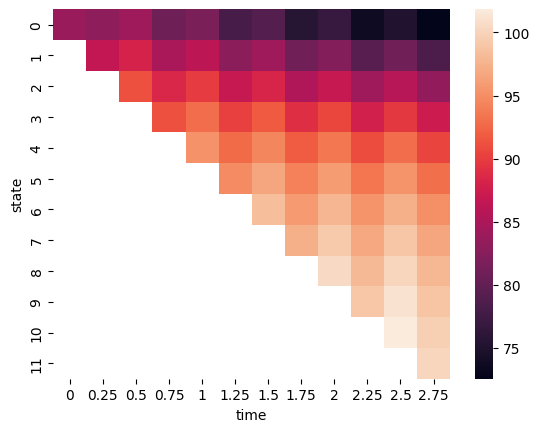

In [158]:
import seaborn as sns

sns.heatmap(callable_bond_value_tree.iloc[:-8, :-8])

***

# 4. Pricing the Callable - Bermudan

#### This Section is NOT REQUIRED and NOT EXPECTED
Still, it is not much additional work, and some of you may find it interesting. It also illustrates the power of binomial trees in how easily they handle the Bermudan style. 

### 4.1.

Re-do part `3`, but this time with **Bermudan** style exercise. 
* This corresponds to the Freddie Mac bond in `HW 1`.
* Note that the option value tree will now go all the way to $T$.

As a reminder, the Bermudan style can be exercised as early as $T_o$ all the way to $T$. It can only be exercised on specific dates at 3-month intervals, but in our quarterly-spaced tree, this means every node from $T_o$ onward.

### 4.2.

Compare the valuation to the market quote in `HW 1`.

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from dateutil.relativedelta import relativedelta
import datetime
from scipy.optimize import minimize
from scipy.optimize import newton
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm
from scipy.optimize import newton
from scipy.optimize import brentq
from scipy.optimize import root_scalar
from scipy.optimize import fsolve
import sys
import os
current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))
import cmds.justin as justin

***